# __Simulación experimentos aleatorios__
 Se carga un dado de manera que los números pares tienen el doble de probabilidad de salir que los impares:



*   ¿A qué es igual la probabilidad de obtener un número par?
*   ¿Un número primo?
*   ¿Un número primo impar?


## __Solución analítica__.

Primero definimos el espacio muestral:

$$\Omega = \{1, \{2,2\}, 3, \{4,4\}, 5, \{6,6\}\}$$ 

A partir del espacio muesrtral podemos verificar que la probabilidad de cada uno de los eventos elementales es $\frac{1}{9}$. Luego:

* La probabilidad de obtener un número par:
  $$ P(par) = \frac{2}{9} + \frac{2}{9} +  \frac{2}{9} = \frac{6}{9} = \frac{2}{3}$$

* La probabilidad de obtener un número primo:
  $$ P(primo) = \frac{2}{9} + \frac{1}{9} + \frac{1}{9} = \frac{4}{9}$$

* La probabilidad de obtener un número primo impar:
  $$ P(primo \cap impar) = \frac{1}{9} + \frac{1}{9} = \frac{2}{9} $$

## __Solución Simulada__

Para estimar la probabilidad a través de simulación podemos simular la ocurrecia del experimento aleatorio generando un número aleatorio. Veamos como simular el lanzamiento de un dado cargado:

In [4]:
import numpy as np
import math

par = [2,4,6]
impar = [1,3,5]
primo = [2,3,5]

resultados = list()
repeticiones = 10000

for i in range(repeticiones):
  dado = math.floor(np.random.rand() * 6) + 1

  if par.__contains__(dado):
    resultados.append('PAR')
  if impar.__contains__(dado):
    resultados.append('IMPAR')
  if primo.__contains__(dado):
    resultados.append('PRIMO')

probabilidad_estimada = [resultados.count('PAR') / repeticiones,resultados.count('PRIMO') / repeticiones,resultados.count('IMPAR') / repeticiones]

print(probabilidad_estimada)

[0.5016, 0.5019, 0.4984]


A continuación se presenta la la estimación de probabilidades para el ejercicio planteado

In [9]:
primo_e_impar = [3,5]
serie_tiempoPar = []
serie_tiempoPrimo = []
serie_tiempoPrimoEImpar = []
resultado = []

for i in range(repeticiones):
    na = math.floor(np.random.rand() * 6) + 1
    if par.__contains__(na):
        resultado.append('PAR')
        resultado.append('PAR')
    if primo.__contains__(na):
        resultado.append('PRIMO')
    if primo_e_impar.__contains__(na):
        resultado.append('PRIMO_E_IMPAR')
    
    serie_tiempoPar.append(resultado.count('PAR')/ (i + 1))
    serie_tiempoPrimo.append(resultado.count('PRIMO')/ (i + 1))
    serie_tiempoPrimoEImpar.append(resultado.count('PRIMO_E_IMPAR')/ (i + 1))

estimado = [resultado.count('PAR')/ repeticiones, resultado.count('PRIMO')/ repeticiones, resultado.count('PRIMO_E_IMPAR')/ repeticiones]

print(estimado)

[1.6, 0.2, 0.4]


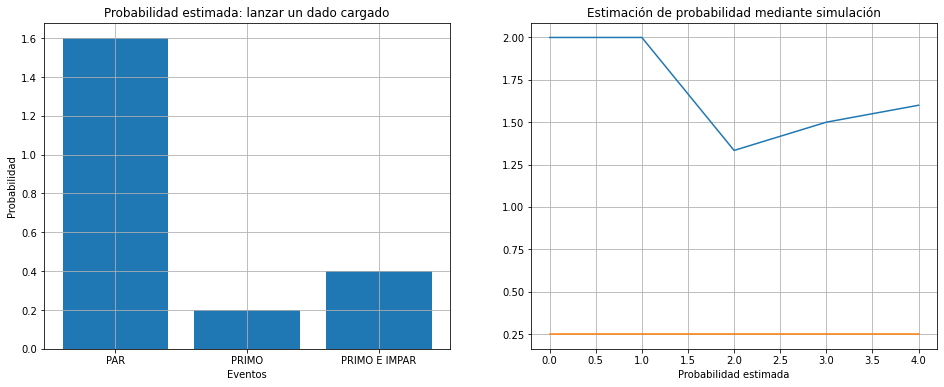

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.subplot(1, 2 ,1)
plt.bar(['PAR', 'PRIMO', 'PRIMO E IMPAR'], estimado)
plt.title('Probabilidad estimada: lanzar un dado cargado')
plt.xlabel('Eventos')
plt.ylabel('Probabilidad')
plt.grid()


plt.subplot(1, 2 ,2)
plt.plot(range(repeticiones), serie_tiempoPar)
plt.plot(range(repeticiones), [0.25]*repeticiones)
plt.xlabel('Repeticiones')
plt.xlabel('Probabilidad estimada')
plt.title('Estimación de probabilidad mediante simulación')
plt.grid()
plt.show()